# Encounter Attribute Distribution Analysis

This notebook analyzes the distribution of key attributes in the `encounters.json` dataset. We will explore the structure, visualize distributions, and examine correlations between attributes, following the same analysis approach as for expeditions.

## 1. Load JSON Data

We will load the encounters data from `data/expeditions/encounters.json` using Python's built-in `json` module and `pandas` for easier analysis.

In [21]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the encounters data
with open('data/expeditions/encounters.json', 'r', encoding='utf-8') as f:
    encounters = json.load(f)

# Convert to DataFrame for easier analysis
encounters_df = pd.DataFrame(encounters)

# Display the number of encounters loaded
print(f"Loaded {len(encounters_df)} encounters.")

Loaded 543 encounters.


## 2. Overview of Encounter Attributes

Let's examine the structure of the dataset by displaying the available columns and a sample of the data.

In [22]:
# Show columns and a sample of the data
print("Columns in dataset:")
print(encounters_df.columns.tolist())

# Show the first 3 rows for context
encounters_df.head(3)

Columns in dataset:
['encounter_id', 'name', 'type', 'tags', 'description_success', 'description_failure', 'check_stat', 'difficulty', 'loot_values', 'condition', 'success_loot_value', 'description', 'modifier']


,encounter_id,name,type,tags,description_success,description_failure,check_stat,difficulty,loot_values,condition,success_loot_value,description,modifier
0,enc_standard_002,Haggle with a Merchant,STANDARD,"[common, urban, social]","With a charming smile and sharp wit, the team ...",The merchant sees them coming a mile away and ...,lck,240.0,"{'common': 8, 'great': 15}",NaN,NaN,NaN,NaN
1,enc_gated_001,"An Ancient, Void-Sealed Door",GATED,"[rare, ruins, magic, void]",A character attuned to the void resonates with...,The door's strange energy repels the team. The...,NaN,NaN,NaN,"{'type': 'elemental', 'value': 'void'}",40.0,NaN,NaN
2,enc_boon_001,Guidance of a Forest Spirit,BOON,"[common, forest, nature, magic]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A benevolent forest spirit appears, pleased wi...","{'type': 'affinity_add', 'affinity': 'favored'..."


## 3. Distribution of Numeric Attributes

Let's visualize the distribution of key numeric attributes, if present (e.g., HP, attack, defense, etc.).

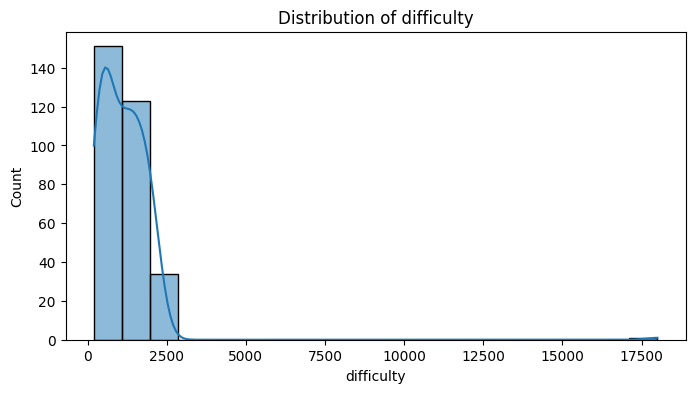

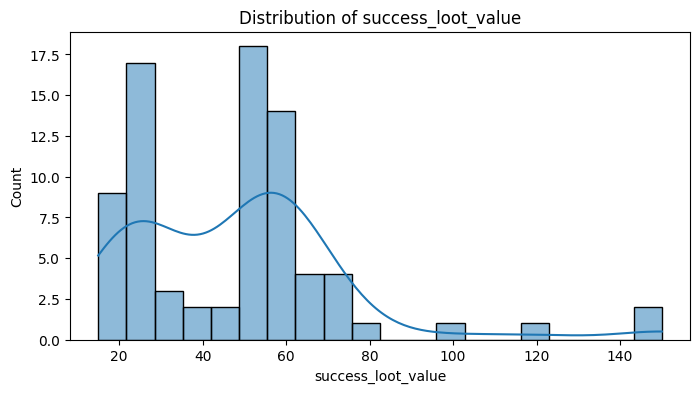

In [23]:
# Identify numeric columns
dtype_map = encounters_df.dtypes.apply(lambda x: x.name)
numeric_cols = [col for col, dtype in dtype_map.items() if dtype in ('int64', 'float64')]

# Plot distributions for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(encounters_df[col].dropna(), bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## 4. Distribution of Categorical Attributes

Let's analyze the distribution of key categorical attributes (e.g., type, tags, etc.), if present.

C:\Users\tungv\AppData\Local\Temp\ipykernel_16180\3090352169.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='tab20')


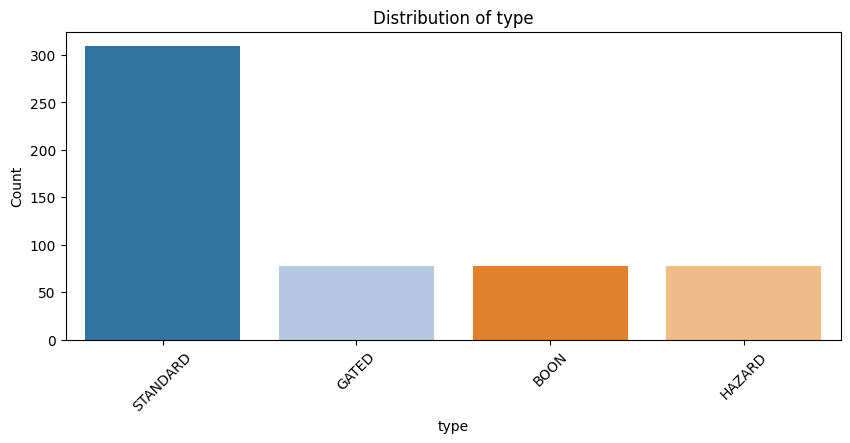

tags
Skipped column 'tags' due to unhashable values.


C:\Users\tungv\AppData\Local\Temp\ipykernel_16180\3090352169.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='tab20')


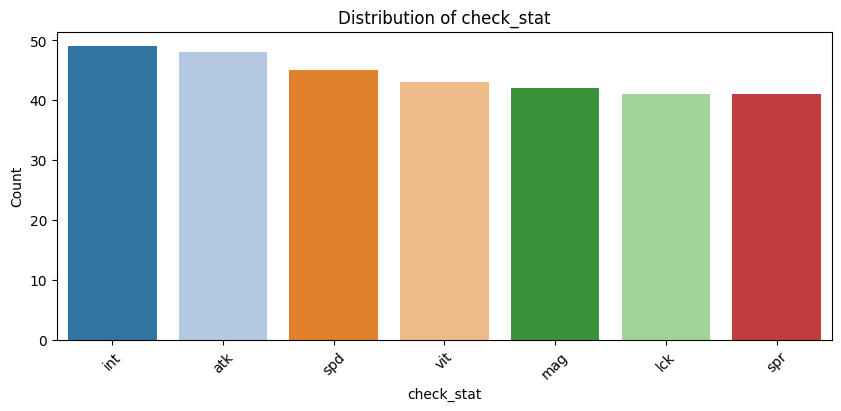

loot_values
Skipped column 'loot_values' due to unhashable values.
condition
Skipped column 'condition' due to unhashable values.
modifier
Skipped column 'modifier' due to unhashable values.


In [24]:
# Identify object columns (potentially categorical)
object_cols = [col for col, dtype in dtype_map.items() if dtype == 'object']

# Plot bar charts for columns with a reasonable number of unique values
for col in object_cols:
    # Skip columns with any list or dict values (unhashable)
    if encounters_df[col].apply(lambda x: isinstance(x, (list, dict))).any():
        print(col)
    try:
        n_unique = encounters_df[col].nunique(dropna=True)
        if 1 < n_unique < 30:
            plt.figure(figsize=(10, 4))
            counts = encounters_df[col].value_counts(dropna=True)
            sns.barplot(x=counts.index.astype(str), y=counts.values, palette='tab20')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
    except TypeError:
        print(f"Skipped column '{col}' due to unhashable values.")

## 5. Distribution of Tag/Array Attributes

If the dataset contains any tag or array-like fields (e.g., tags, abilities), let's aggregate and plot the frequency of each value.

C:\Users\tungv\AppData\Local\Temp\ipykernel_16180\188146651.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='mako')


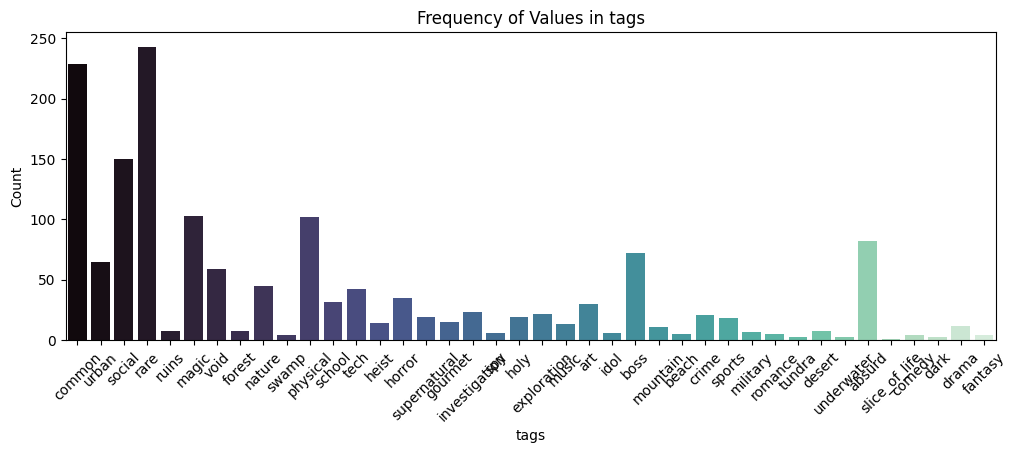

In [25]:
# Example: Analyze 'tags' or similar array-like columns if present
array_like_cols = [col for col in encounters_df.columns if encounters_df[col].apply(lambda x: isinstance(x, list)).any()]

for col in array_like_cols:
    all_items = []
    for items in encounters_df[col]:
        if isinstance(items, list):
            all_items.extend(items)
    if all_items:
        counts = Counter(all_items)
        plt.figure(figsize=(12, 4))
        sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='mako')
        plt.title(f'Frequency of Values in {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

## 6. Correlation Analysis Between Numeric Attributes

Let's compute and visualize the correlations between numeric attributes, if there are at least two.

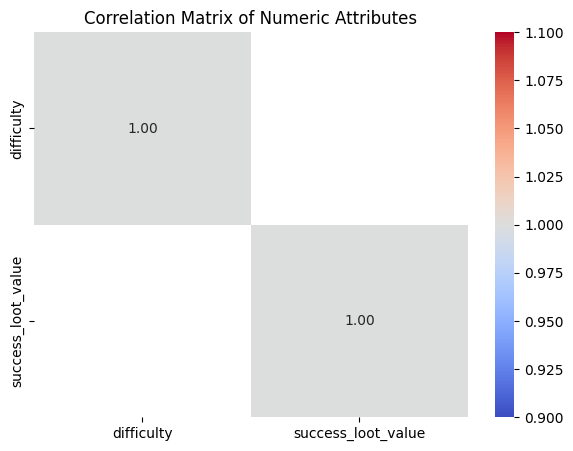

In [26]:
if len(numeric_cols) > 1:
    corr = encounters_df[numeric_cols].corr()
    plt.figure(figsize=(7, 5))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Numeric Attributes')
    plt.show()
else:
    print('Not enough numeric columns for correlation analysis.')

## 7. Distribution of Joint Attribute Combinations

If there are any list/tuple attributes (e.g., abilities, tags), let's analyze the most common combinations as a group.

C:\Users\tungv\AppData\Local\Temp\ipykernel_16180\1064591709.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='flare')


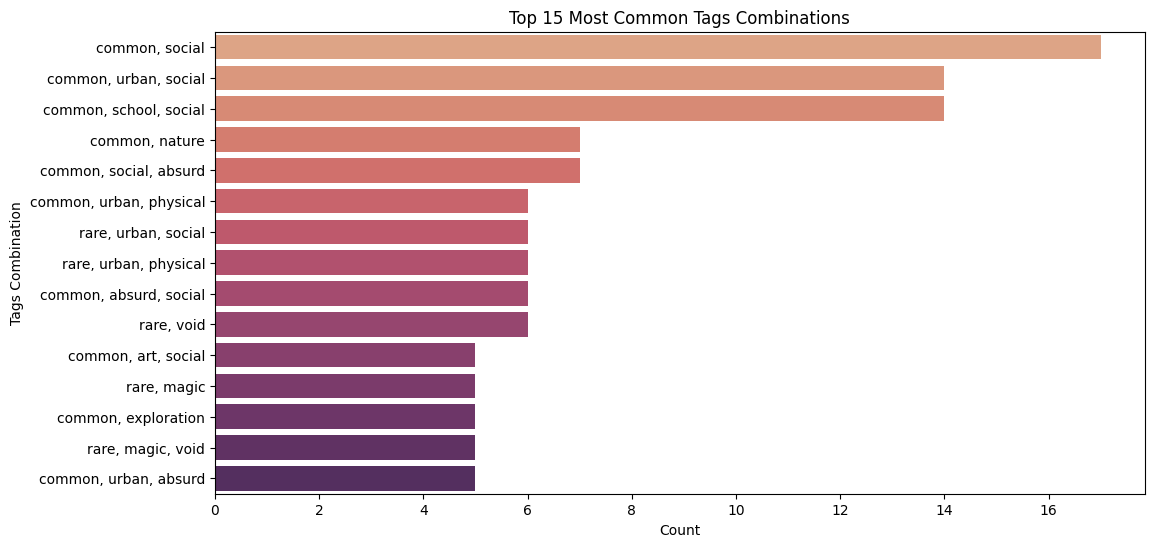

In [27]:
# Example: Most common tag/ability combinations (as tuple)
for col in array_like_cols:
    combos = []
    for items in encounters_df[col]:
        if isinstance(items, list):
            combos.append(tuple(items))
        elif pd.notnull(items):
            combos.append((items,))
        else:
            combos.append(())
    combo_counts = Counter(combos)
    most_common = combo_counts.most_common(15)
    if most_common:
        plt.figure(figsize=(12, 6))
        labels = [', '.join(combo) if combo else '(none)' for combo, _ in most_common]
        counts = [count for _, count in most_common]
        sns.barplot(x=counts, y=labels, palette='flare')
        plt.title(f'Top 15 Most Common {col.capitalize()} Combinations')
        plt.xlabel('Count')
        plt.ylabel(f'{col.capitalize()} Combination')
        plt.show()